# Script to plot Power Spectra and write the Beta Profile Excel sheet

In [1]:
import os
import sys
import importlib
from importlib import reload 
from dataclasses import dataclass, field, fields
from itertools import compress
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import scipy
import scipy.io as sio
from scipy import signal
from scipy.signal import spectrogram, hann, butter, filtfilt, freqz
from scipy import stats

import pickle
import json
import csv

#mne
import mne_bids
import mne
from mne.time_frequency import tfr_morlet 
from mne.stats import permutation_cluster_test
from mne.preprocessing import ICA, create_ecg_epochs

In [2]:
jennifer_user_path = os.getcwd()
while jennifer_user_path[-14:] != 'jenniferbehnke':
    jennifer_user_path = os.path.dirname(jennifer_user_path)

# directory to this Repository
project_path = os.path.join(jennifer_user_path, 'code', 'Beta_profile_project', 'Beta_profile')
sys.path.append(project_path)

os.chdir(project_path)

import src.beta.utils.find_folders as find_folders
importlib.reload(find_folders)

# import PyPerceive
project_path = find_folders.chdir_repository("Py_Perceive")

from PerceiveImport.classes import (
    main_class, modality_class, metadata_class,
    session_class, condition_class, task_class,
    contact_class, run_class
)

import PerceiveImport.methods.load_rawfile as load_rawfile
import PerceiveImport.methods.find_folders as PyPerceive_find_folders
import PerceiveImport.methods.metadata_helpers as metaHelpers



# import all functions from the local repository
project_path = find_folders.chdir_repository("Beta_profile")

# utils
import src.beta.utils.find_folders as find_folders
import src.beta.utils.io as io

# tfr
import src.beta.preprocessing.tfr as tfr

# plots
import src.beta.plotting.power_spectra_plots as power_spectra

# beta profile
import src.beta.beta_profile.beta_profile_sheet as beta_profile


importlib.reload(find_folders)
importlib.reload(io)
importlib.reload(tfr)
importlib.reload(power_spectra)
importlib.reload(beta_profile)

<module 'src.beta.beta_profile.beta_profile_sheet' from '/Users/jenniferbehnke/code/Beta_profile_project/Beta_profile/src/beta/beta_profile/beta_profile_sheet.py'>

## Time Series Plots: check for ECG artifact

## Power Spectra

This function plots 2 Power spectra Figures: 
- Ring: channels 01, 12, 23
- Segm: all segmental bipolar channels


	### WARNING: NaNs in Metadata Table sub-019 ###
NaNs in: sub019_ses-2021042207162599_run-BrainSense20210422074600.mat
NaNs in: sub019_ses-2021042207162599_run-BrainSense20210422075600.mat
NaNs in: sub019_ses-2021042207162599_run-IS20210422081000.mat
NaNs in: sub019_ses-2021042207162599_run-IS20210422081300.mat
NaNs in: sub019_ses-2021042207162599_run-IS20210422081500.mat
NaNs in: sub019_ses-2021042207162599_run-IS20210422081900.mat
NaNs in: sub019_ses-2021070506275097_run-BrainSense20210705070700.mat
NaNs in: sub019_ses-2021070506275097_run-BrainSense20210705072100.mat
NaNs in: sub019_ses-2021070507365797_run-BrainSense20210705074000.mat
NaNs in: sub019_ses-2021070507365797_run-BrainSense20210705074300.mat
NaNs in: sub019_ses-2021070507365797_run-BrainSense20210705075000.mat
NaNs in: sub019_ses-2021070507365797_run-BrainSense20210705075800.mat
NaNs in: sub019_ses-2021070507365797_run-BrainSense20210705081000.mat
NaNs in: sub019_ses-2021070508345297_run-BrainSense20210705084300.mat
Na

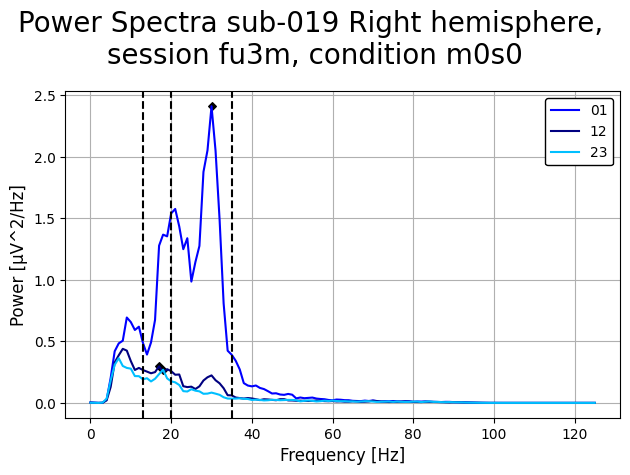

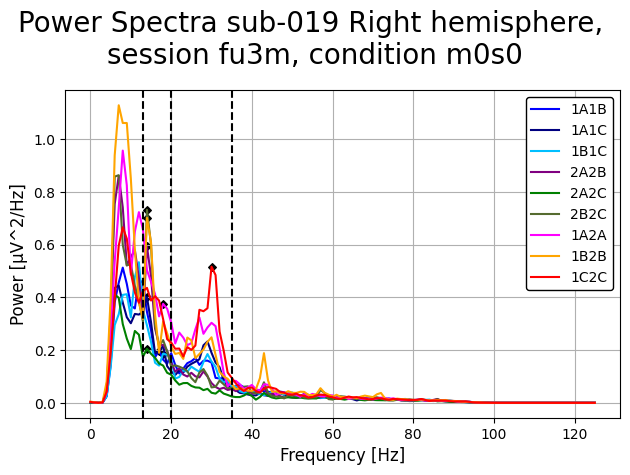

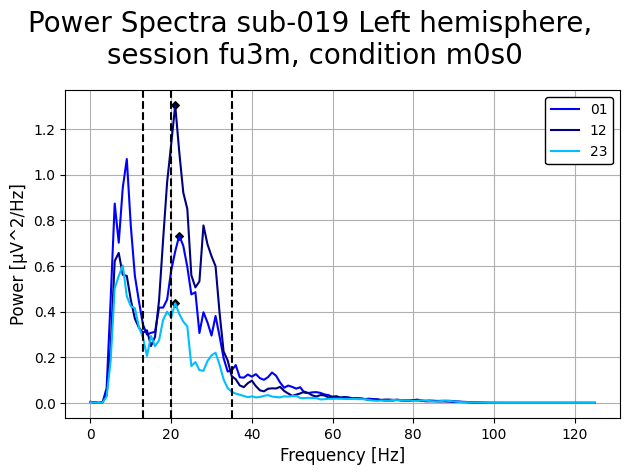

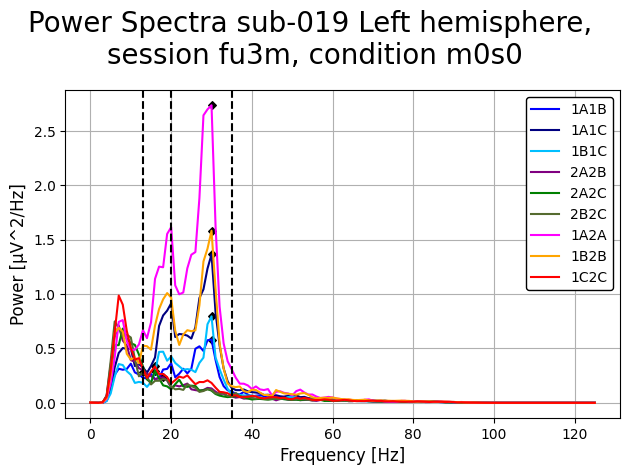

In [9]:
# band-pass filtered 5-95 Hz
# fourier transform: 1Hz resolution, 1 sec window length
HEMISPHERES = ["Right", "Left"]

for hem in HEMISPHERES:

    power_spectra_plot = power_spectra.plot_power_spectra(
        sub="019",
        session="fu3m",
        condition="m0s0",
        hemisphere=hem
    )


## Beta Profile Excel Sheet

In [10]:
beta_file = beta_profile.write_beta_profile(
    sub="019",
    session="fu3m",
    condition="m0s0",
)


	### WARNING: NaNs in Metadata Table sub-019 ###
NaNs in: sub019_ses-2021042207162599_run-BrainSense20210422074600.mat
NaNs in: sub019_ses-2021042207162599_run-BrainSense20210422075600.mat
NaNs in: sub019_ses-2021042207162599_run-IS20210422081000.mat
NaNs in: sub019_ses-2021042207162599_run-IS20210422081300.mat
NaNs in: sub019_ses-2021042207162599_run-IS20210422081500.mat
NaNs in: sub019_ses-2021042207162599_run-IS20210422081900.mat
NaNs in: sub019_ses-2021070506275097_run-BrainSense20210705070700.mat
NaNs in: sub019_ses-2021070506275097_run-BrainSense20210705072100.mat
NaNs in: sub019_ses-2021070507365797_run-BrainSense20210705074000.mat
NaNs in: sub019_ses-2021070507365797_run-BrainSense20210705074300.mat
NaNs in: sub019_ses-2021070507365797_run-BrainSense20210705075000.mat
NaNs in: sub019_ses-2021070507365797_run-BrainSense20210705075800.mat
NaNs in: sub019_ses-2021070507365797_run-BrainSense20210705081000.mat
NaNs in: sub019_ses-2021070508345297_run-BrainSense20210705084300.mat
Na

In [5]:
beta_file["Left_Ring"]

,channel,f_range,power_in_f_range,peak_CF,peak_power,peak_4Hz_power,beta_rank,rel_beta_peak_power
5,12,beta,0.601282,21.0,1.303219,1.084612,1.0,1.000000
2,01,beta,0.402628,22.0,0.732766,0.651707,2.0,0.600867
8,23,beta,0.242405,21.0,0.436477,0.391055,3.0,0.360548


In [6]:
beta_file["Left_Segm"]

,channel,f_range,power_in_f_range,peak_CF,peak_power,peak_4Hz_power,beta_rank,rel_beta_peak_power
29,1A2A,beta,1.285654,30.0,2.733345,2.115520,1.0,1.000000
32,1B2B,beta,0.750913,30.0,1.580921,1.176927,2.0,0.556330
14,1A1C,beta,0.652438,30.0,1.363525,0.999202,3.0,0.472320
17,1B1C,beta,0.343451,30.0,0.794458,0.531500,4.0,0.251238
11,1A1B,beta,0.312980,30.0,0.581471,0.452736,5.0,0.214007
35,1C2C,beta,0.203650,16.0,0.334460,0.275588,6.0,0.130270
26,2B2C,beta,0.146077,13.0,0.281724,0.267869,7.0,0.126621
23,2A2C,beta,0.150860,16.0,0.296483,0.216464,8.0,0.102322
20,2A2B,beta,0.157225,18.0,0.234891,0.204938,9.0,0.096873


In [7]:
beta_file["Right_Ring"]

,channel,f_range,power_in_f_range,peak_CF,peak_power,peak_4Hz_power,beta_rank,rel_beta_peak_power
2,01,beta,1.221689,30.0,2.411491,1.976242,1.0,1.000000
5,12,beta,0.191128,17.0,0.297268,0.262768,2.0,0.132964
8,23,beta,0.127590,18.0,0.269737,0.214805,3.0,0.108693


In [8]:
beta_file["Right_Segm"]

,channel,f_range,power_in_f_range,peak_CF,peak_power,peak_4Hz_power,beta_rank,rel_beta_peak_power
32,1B2B,beta,0.241967,14.0,0.701439,0.469491,1.0,1.000000
26,2B2C,beta,0.180720,14.0,0.732059,0.463925,2.0,0.988145
20,2A2B,beta,0.165303,14.0,0.592831,0.430483,3.0,0.916913
35,1C2C,beta,0.294962,30.0,0.516374,0.395482,4.0,0.842362
29,1A2A,beta,0.295212,18.0,0.375310,0.355545,5.0,0.757299
14,1A1C,beta,0.173357,14.0,0.400011,0.315164,6.0,0.671288
23,2A2C,beta,0.088804,14.0,0.204979,0.198882,7.0,0.423612
11,1A1B,beta,0.166502,17.0,0.197956,0.191722,8.0,0.408360
17,1B1C,beta,0.150801,18.0,0.186776,0.165853,9.0,0.353261
